In [1]:
library(Seurat)
library(future)
library(ggplot2)
library(ggplotify)
library(patchwork)
library(dplyr)
library(ggpubr)
library(stringr)
library(reshape2)
library(tidydr)
library(cowplot)
library(CellChat)
library(NMF)
library(tidyr)
library(tibble)
library(ggraph)
library(ggrepel)
library(tidygraph)
library(RColorBrewer)
library(circlize)
library(ComplexHeatmap)
options(jupyter.plot_scale=1, future.globals.maxSize= 16*1024^3)
`%nin%` = Negate(`%in%`)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:future’:

    %->%, %<-%


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

 

In [2]:
update_geom_defaults("point", aes(stroke = 0.1))

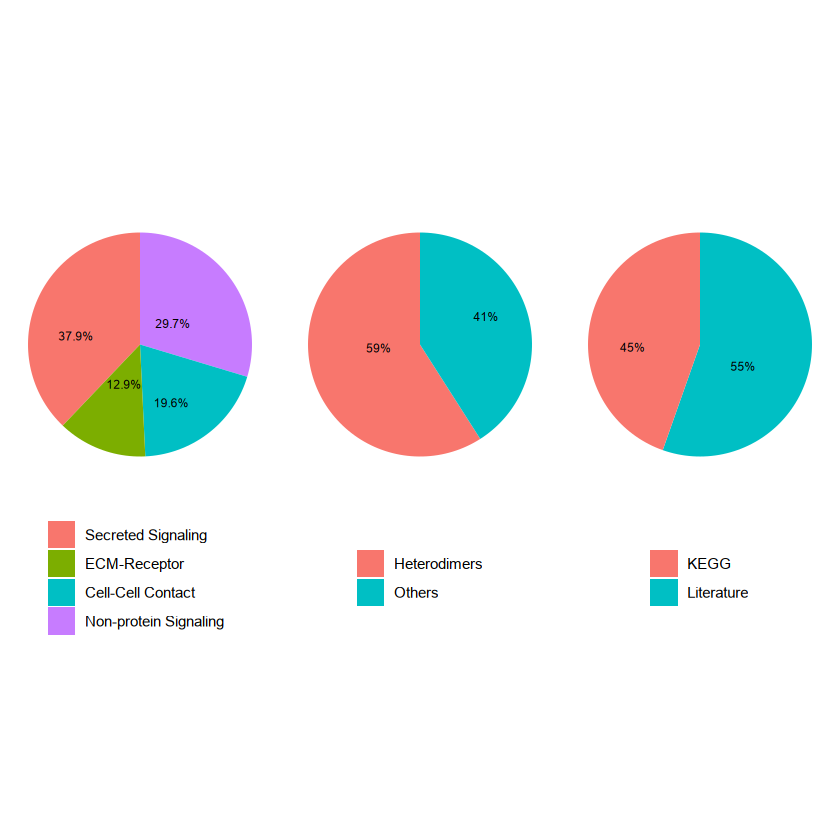

In [3]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)
CellChatDB.use <- subsetDB(CellChatDB)

In [4]:
seu <- readRDS('data/b16_5batch.rds')
seu <- subset(seu, subtype %in% c('CD4+Th1','CD4+Th17','CD4+Th2','CD4+Treg','CD8+Prolif','CD8+Te','CD8+Tex','CD8+NK-like',
                                  'Inflam-TAM/Mono','Naive-TAM','NC-Mono','Prolif-TAM','Reg-TAM',
                                  'cDC1','cDC2','MigDC','pDC','B'))
seu$type <- recode(seu$subtype, 'CD4+Th1'='CD4+Th','CD4+Th17'='CD4+Th','CD4+Th2'='CD4+Th','CD8+Prolif'='CD8+T',
                   'CD8+Te'='CD8+T','CD8+Tex'='CD8+T','CD8+NK-like'='CD8+T','Inflam-TAM/Mono'='Macro/Mono',
                   'Naive-TAM'='Macro/Mono','NC-Mono'='Macro/Mono','Prolif-TAM'='Macro/Mono','Reg-TAM'='Macro/Mono')

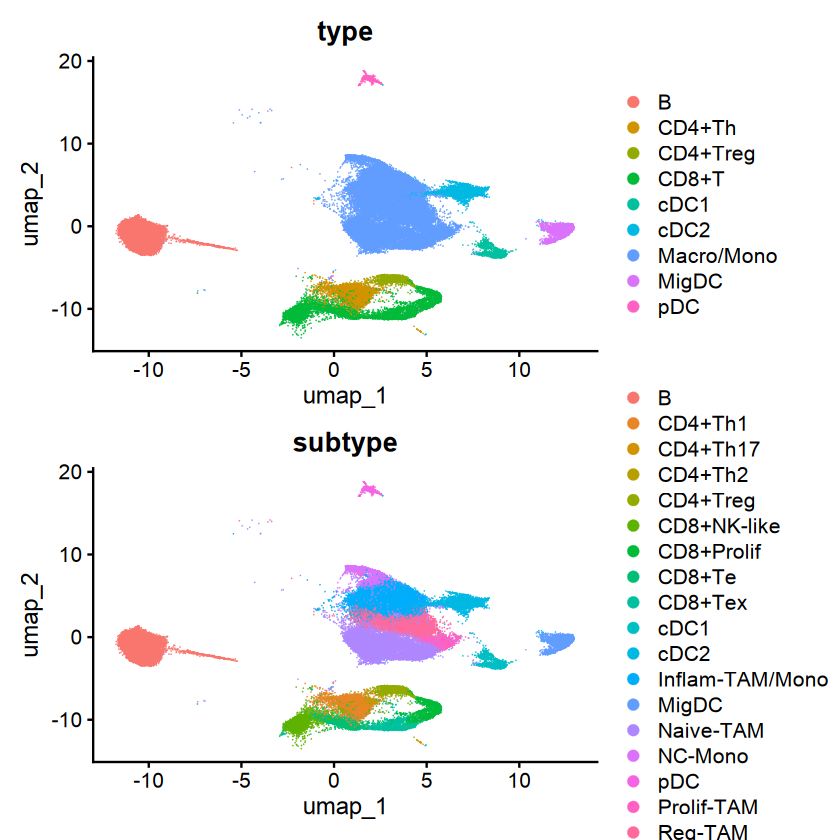

In [5]:
DimPlot(seu, group.by=c('type','subtype'), ncol=1)

### communication among major clusters

In [6]:
cc_ctrl <- createCellChat(object = subset(seu, treatment == "Control" ), group.by = "type")
cc_vlp <- createCellChat(object = subset(seu, treatment == "VLP" ), group.by = "type")
cc_aid <- createCellChat(object = subset(seu, treatment == "αCTLA4 ID" ), group.by = "type")
cc_aiv <- createCellChat(object = subset(seu, treatment == "αCTLA4 IV"), group.by = "type")
cc_ivid <- createCellChat(object = subset(seu, treatment == "αCTLA4 IV + VLP"), group.by = "type")
cc_idid <- createCellChat(object = subset(seu, treatment == "αCTLA4 ID + VLP"), group.by = "type")
object.list <- list("Control"=cc_ctrl, "αCTLA4 IV"=cc_aiv, "αCTLA4 IV + VLP"=cc_ivid, 
                 "αCTLA4 ID"=cc_aid, "αCTLA4 ID + VLP"=cc_idid, "VLP"=cc_vlp)

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "Control"), :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 
[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "VLP"), group.by = "type"):
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 
[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "αCTLA4 ID"), :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 
[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "αCTLA4 IV"), :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 
[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "αCTLA4 IV + VLP"), :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 
[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = subset(seu, treatment == "αCTLA4 ID + VLP"), :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, CD4+Th, CD4+Treg, CD8+T, cDC1, cDC2, Macro/Mono, MigDC, pDC 


In [7]:
for(i in names(object.list))
{
    obj <- object.list[[i]]
    obj@DB <- CellChatDB.use
    obj <- obj %>% subsetData() %>% identifyOverExpressedGenes() %>% identifyOverExpressedInteractions() %>% smoothData(adj=PPI.mouse) %>%
            computeCommunProb(type = "triMean") %>% filterCommunication(min.cells = 10) %>% computeCommunProbPathway() %>% 
            aggregateNet() %>% netAnalysis_computeCentrality(slot.name = "netP")
    object.list[[i]] <- obj
}
saveRDS(object.list, 'data/b16_cellchat_obj.rds')

triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1276 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-06-22 19:30:21.766882]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-06-22 19:41:05.792053]"
triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1136 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-06-22 19:41:23.745975]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-06-22 19:51:16.633662]"
triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1191 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-06-22 19:51:32.383441]"
[1] ">>> C

In [8]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



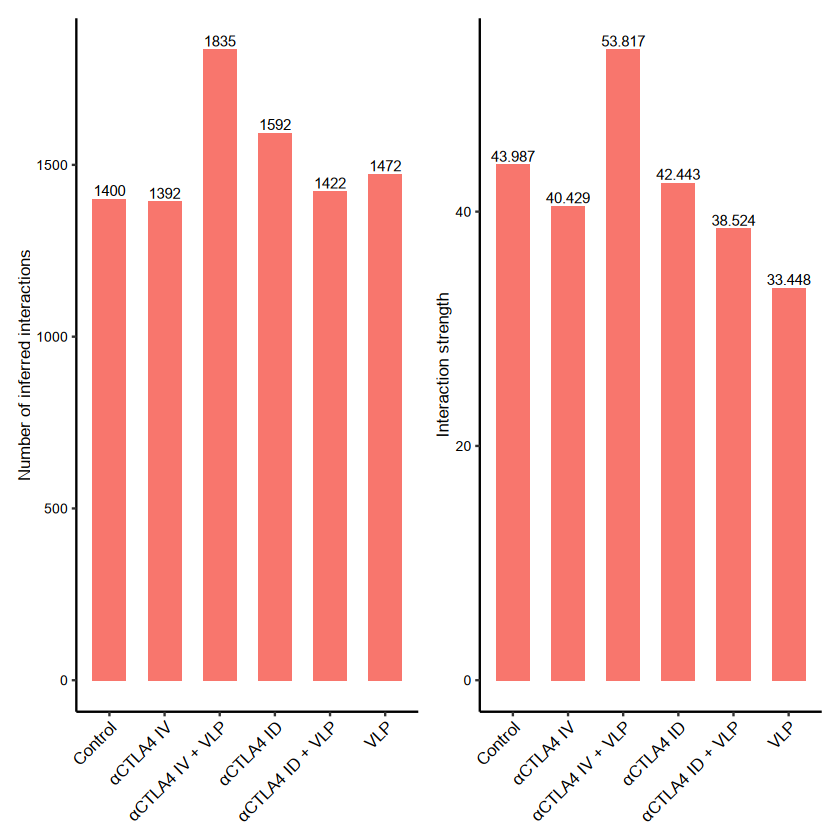

In [9]:
gg1 <- compareInteractions(cellchat, show.legend = F, x.lab.rot=T)
gg2 <- compareInteractions(cellchat, show.legend = F, measure = "weight", x.lab.rot=T)
gg1 + gg2

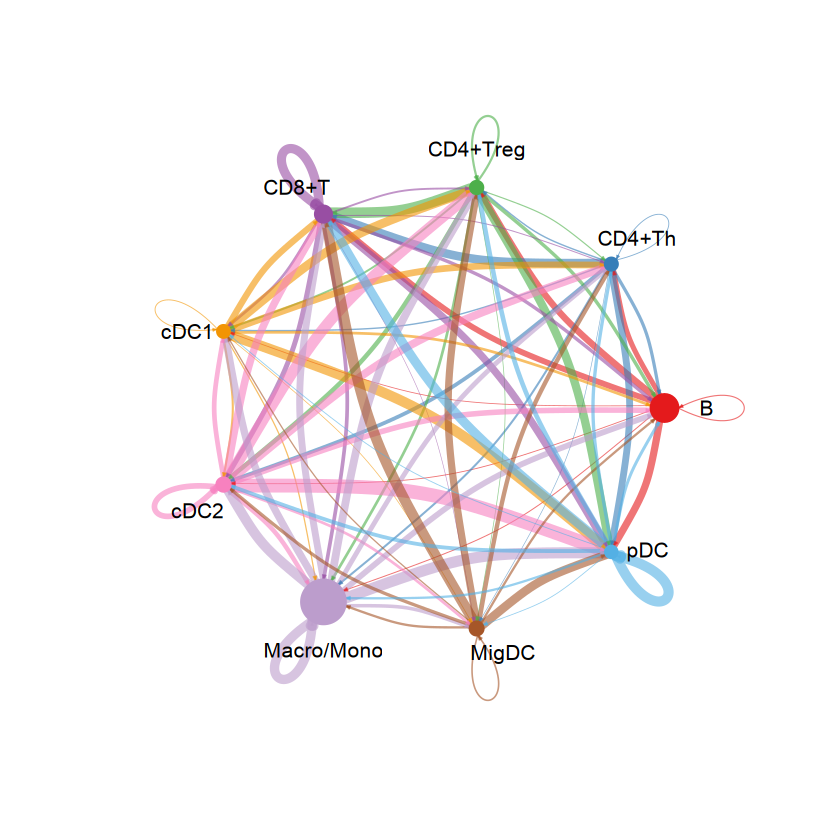

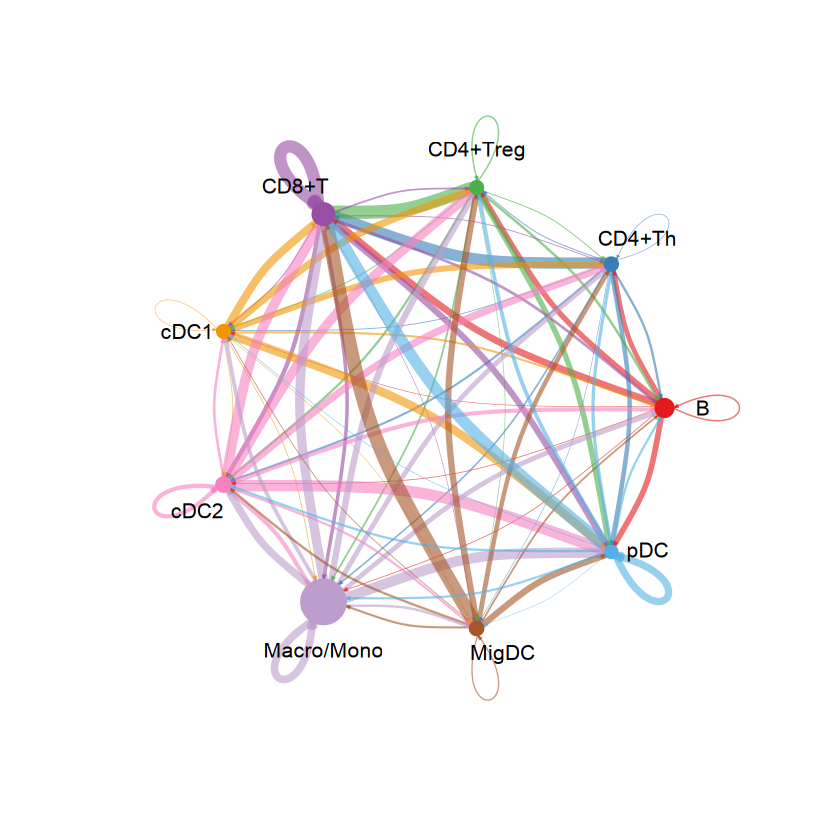

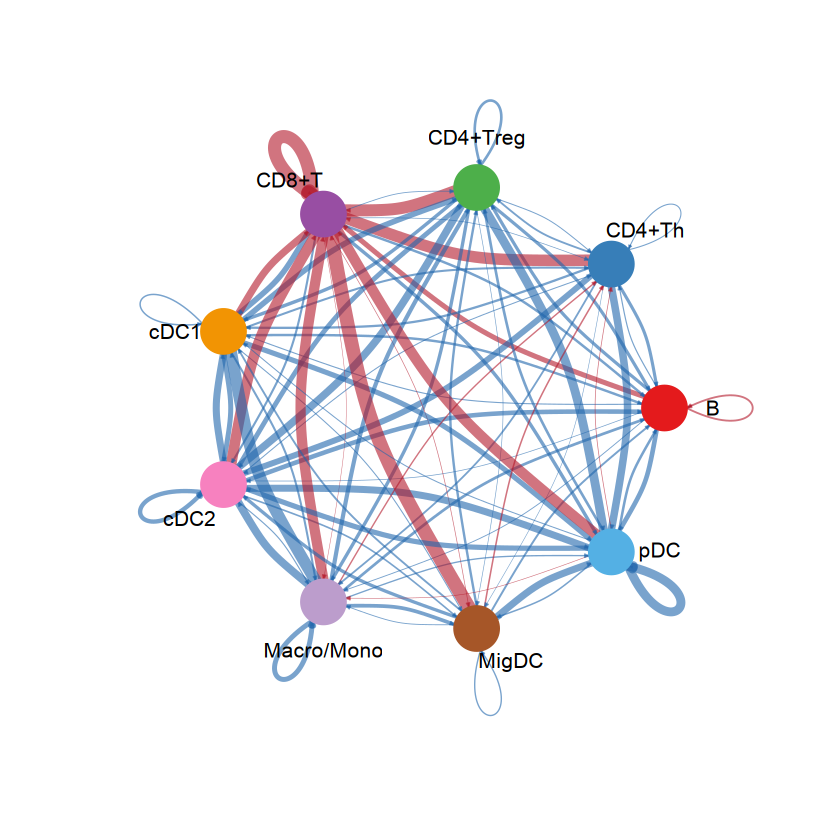

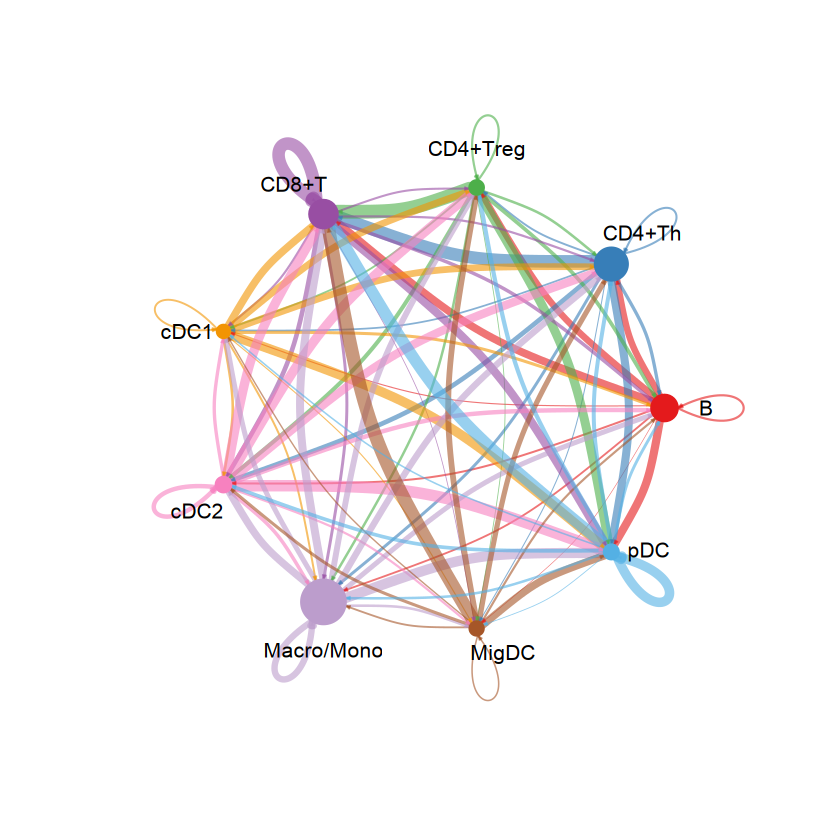

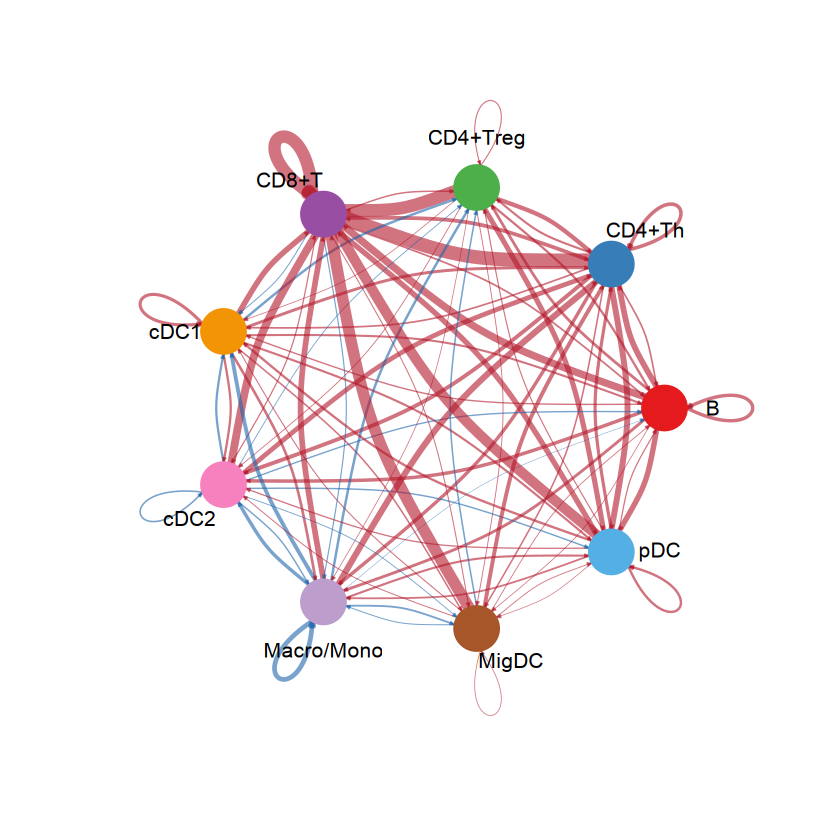

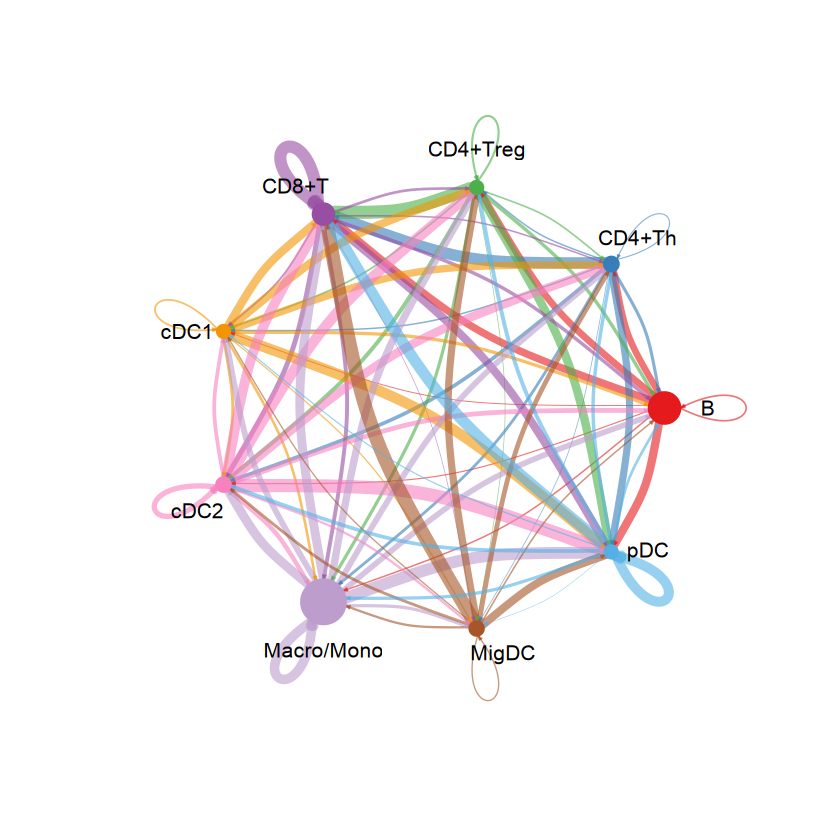

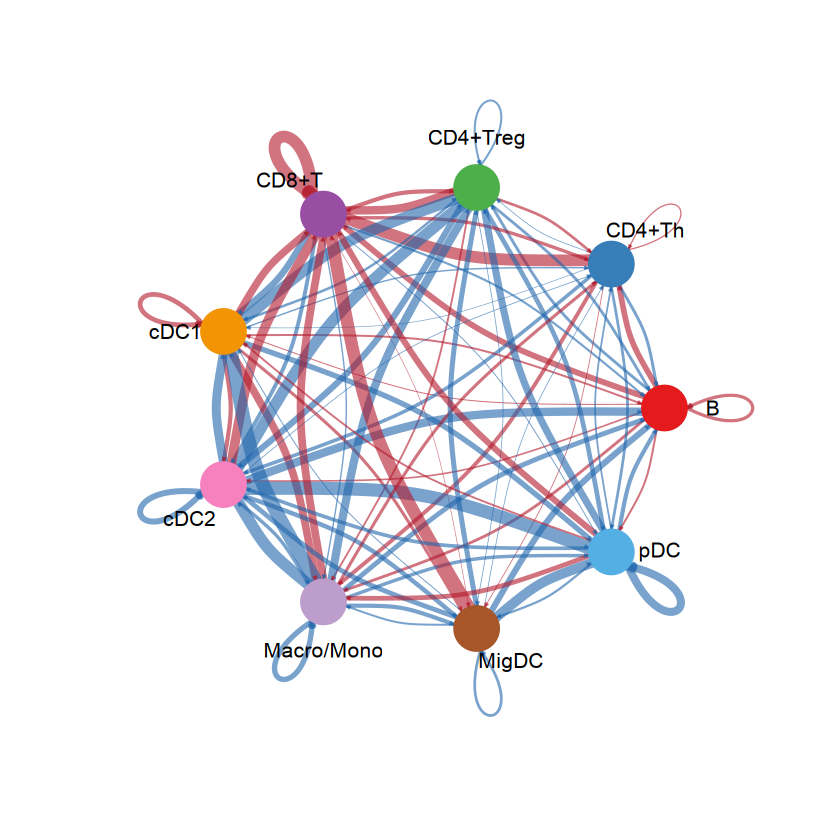

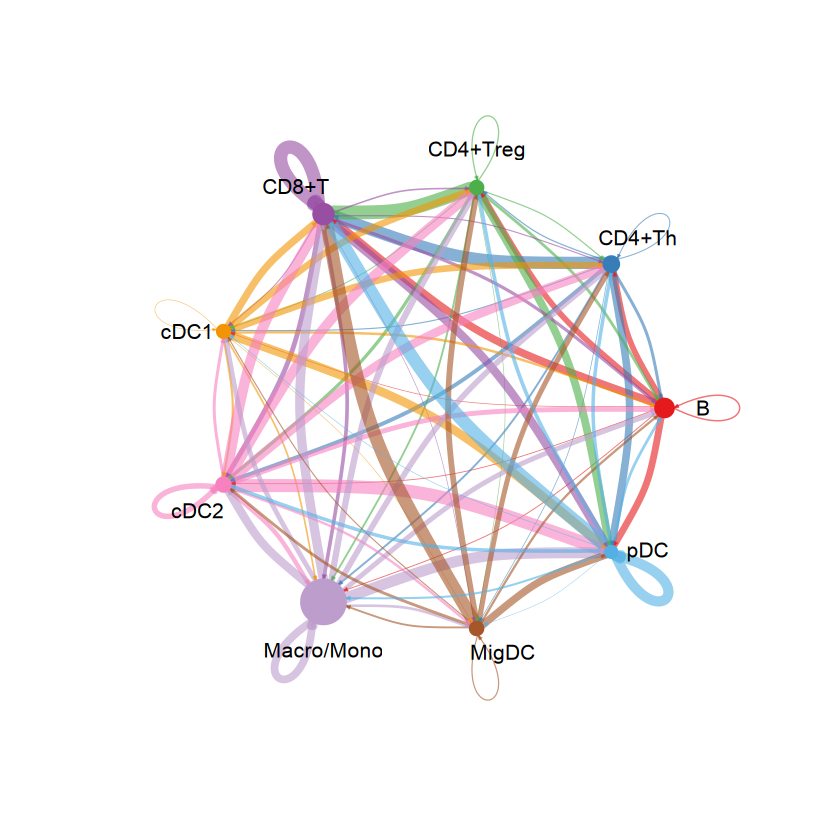

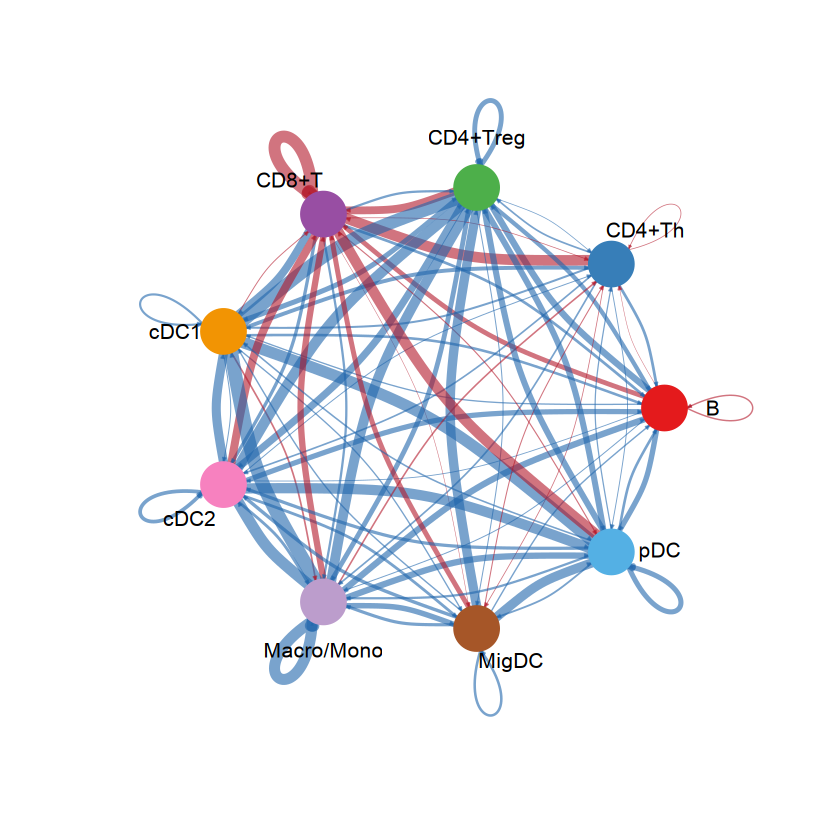

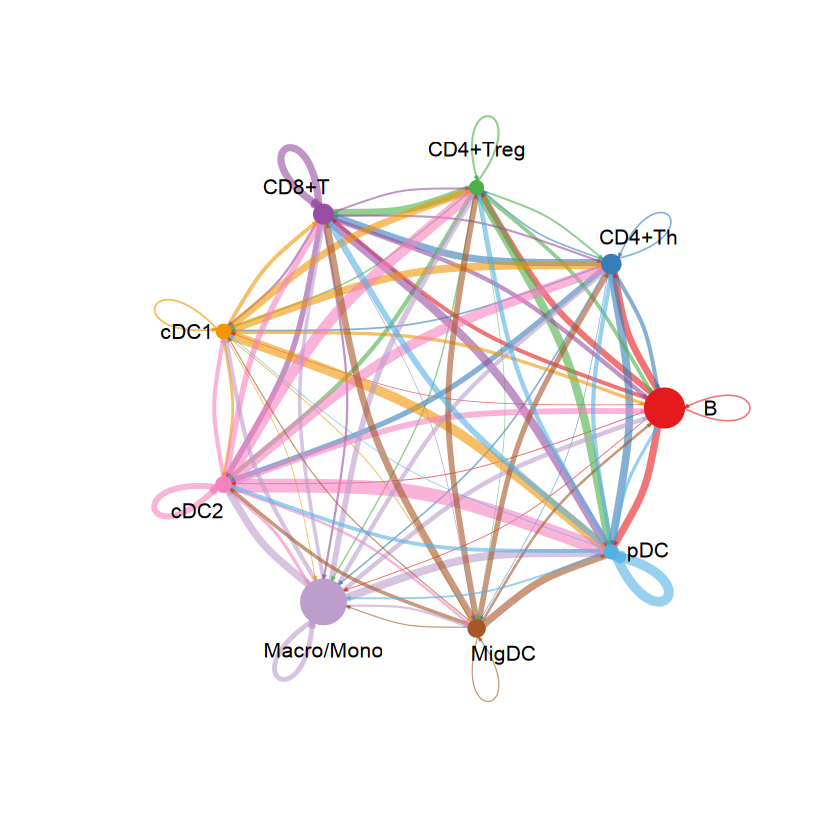

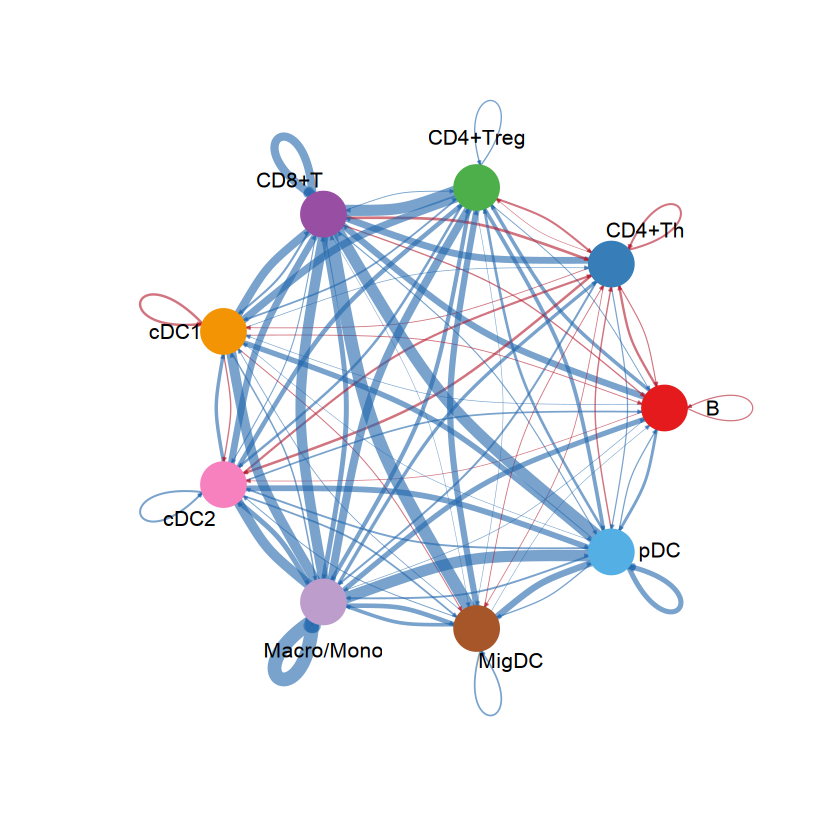

In [10]:
for(i in 1:6)
{
    groupSize <- as.numeric(table(object.list[[i]]@idents))
    circ <- netVisual_circle(object.list[[i]]@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, 
                 title.name = "Interaction strength")
    write.csv(object.list[[1]]@net$weight, paste('csv/cell_comm_strength_', names(object.list)[i], '.csv',sep=''), quote=F)
    pdf(paste('plot/circle_', names(object.list)[i], '.pdf',sep=''), width = 7, height =7) 
    replayPlot(circ) 
    dev.off()
    if(i > 1)
    {
        circ_diff <- netVisual_diffInteraction(cellchat, measure='weight', weight.scale = T, comparison=c(1,i))
        pdf(paste('plot/circle_diff_', names(object.list)[i], ' vs Control.pdf',sep=''), width = 7, height =7) 
        replayPlot(circ_diff) 
        dev.off()
    }
}

In [11]:
singaling_pathways_sum <- function(object)
{
    centr <-  slot(object, 'netP')$centr
    outgoing <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
    incoming <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
    dimnames(outgoing) <- list(levels(object@idents), names(centr))
    dimnames(incoming) <- dimnames(outgoing)
    for (i in 1:length(centr)) {
        outgoing[,i] <- centr[[i]]$outdeg
        incoming[,i] <- centr[[i]]$indeg
    }
    mat <- t(outgoing + incoming)#
    return(rowSums(mat))
}
union_signalings <- Reduce(union, list(names(singaling_pathways_sum(object.list[[1]])), 
                                       names(singaling_pathways_sum(object.list[[2]])),
                                       names(singaling_pathways_sum(object.list[[3]])), 
                                       names(singaling_pathways_sum(object.list[[4]])),
                                       names(singaling_pathways_sum(object.list[[5]])),
                                       names(singaling_pathways_sum(object.list[[6]]))))
union_signalings

[1] "MHC-I"      "MHC-II"     "MIF"        "APP"        "CCL"       
 [6] "GALECTIN"   "SELPLG"     "CD86"       "ADGRE"      "THY1"      
[11] "CD80"       "CD45"       "ICAM"       "SPP1"       "FN1"       
[16] "SIRP"       "LAIR1"      "CXCL"       "LAMININ"    "SEMA4"     
[21] "THBS"       "CD6"        "CD52"       "ApoE"       "ICOS"      
[26] "LCK"        "CLEC"       "PD-L1"      "BST2"       "TGFb"      
[31] "CD23"       "SEMA7"      "CD40"       "CD48"       "GRN"       
[36] "CDH1"       "PLAU"       "PECAM1"     "VISFATIN"   "CADM"      
[41] "CD39"       "CD137"      "CEACAM"     "IL16"       "NKG2D"     
[46] "PDL2"       "IFN-II"     "XCR"        "FLT3"       "JAM"       
[51] "IGF"        "PECAM2"     "NECTIN"     "CD200"      "APRIL"     
[56] "CDH"        "ADGRG"      "FLRT"       "IL1"        "CDH5"      
[61] "VWF"        "FASLG"      "GAS"        "COMPLEMENT" "IL10"      
[66] "PVR"        "OSM"        "CD96"       "NOTCH"

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



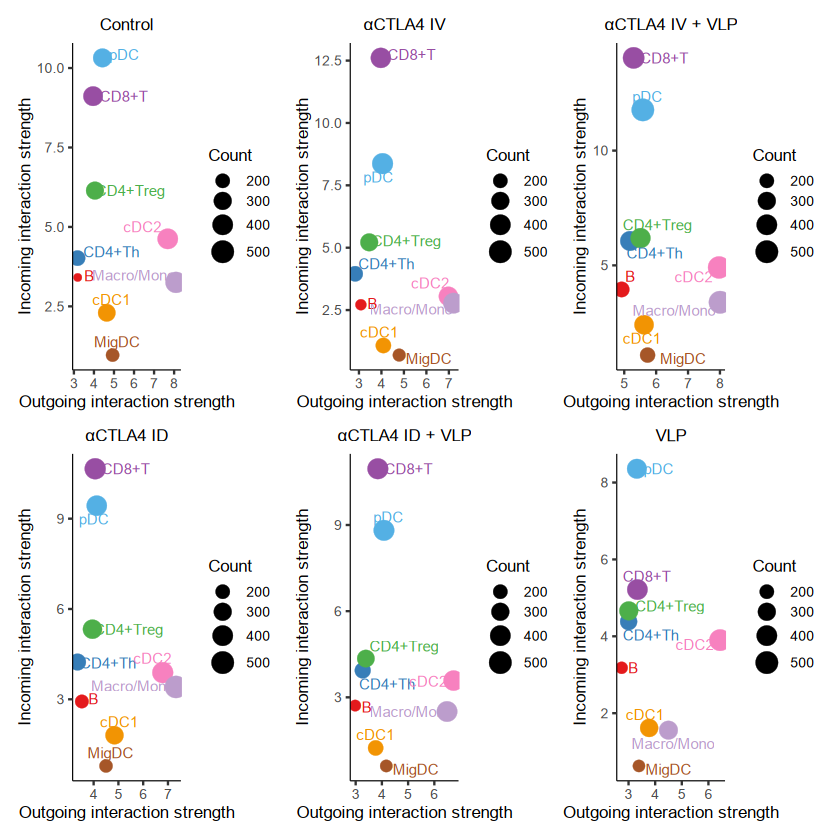

In [12]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
patchwork::wrap_plots(plots = gg)

## MHC signaling between T cells and APCs

In [13]:
mhc_prob_df <- NULL
for(treatment_i in names(object.list))
{
    net_prob <- slot(object.list[[treatment_i]], 'netP')
    mhc1_prob <- net_prob[['prob']][,,net_prob[['pathways']] == 'MHC-I'][c(1,5:9),4]
    mhc2_prob <- net_prob[['prob']][,,net_prob[['pathways']] == 'MHC-II'][c(1,5:9),2]
    mhc_prob_df_i <- data.frame(mhc1 = mhc1_prob, mhc2 = mhc2_prob, treatment=treatment_i) %>% rownames_to_column('cell')
    mhc_prob_df <- rbind(mhc_prob_df, mhc_prob_df_i)
}
mhc_prob_df <- mhc_prob_df %>% mutate(mhc1_diff=mhc1-.$mhc1[1:6], mhc2_diff=mhc2-.$mhc2[1:6], treatment=factor(treatment, levels=unique(treatment)))

pdf 
  2

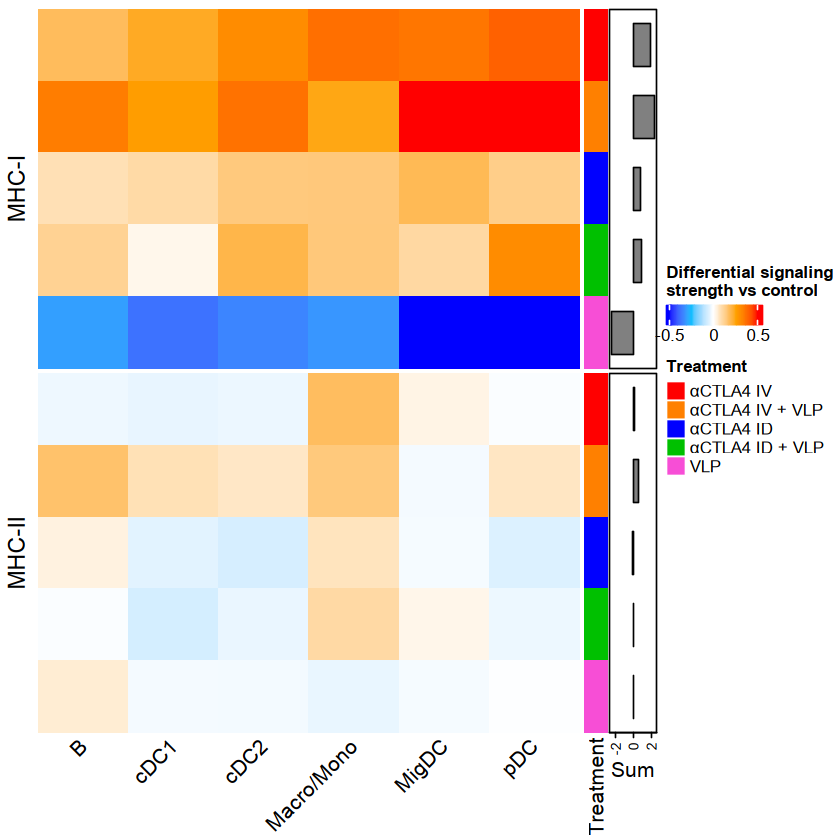

In [14]:
mat_mhc1_diff <- dcast(mhc_prob_df, cell ~ treatment, value.var='mhc1_diff') %>% column_to_rownames('cell') %>% .[,-1] %>% t()
mat_mhc2_diff <- dcast(mhc_prob_df, cell ~ treatment, value.var='mhc2_diff') %>% column_to_rownames('cell') %>% .[,-1] %>% t()
mat_mhc_diff <- rbind(mat_mhc2_diff, mat_mhc1_diff)
ht_cols <- c('red','#FF8000','blue','#00C000','#F74ED6')
names(ht_cols) <- unique(rownames(mat_mhc_diff))
row_ha <- rowAnnotation('Treatment'= factor(rownames(mat_mhc_diff),levels=c('αCTLA4 IV','αCTLA4 IV + VLP','αCTLA4 ID','αCTLA4 ID + VLP','VLP')),
                        'Sum'=anno_barplot(rowSums(mat_mhc_diff), height = unit(0.5, "in")),
                        col=list('Treatment'=ht_cols))
ht <- Heatmap(mat_mhc_diff, cluster_columns=F, cluster_rows=F, name='Differential signaling\nstrength vs control', right_annotation = row_ha, #
              row_split = c(rep('MHC-II', 5), rep('MHC-I', 5)), show_row_names = F, heatmap_legend_param = list(direction = "horizontal"),
              column_names_rot = 45,
              col = colorRamp2(c(-0.5,-0.25,0,0.25,0.5),c('blue','deepskyblue','white','orange','red')))
cairo_pdf('plot/b16_heat_cellchat_mhc.pdf', width = 3.7, height =3) 
draw(ht, legend_grouping = "original", merge_legend = TRUE)
dev.off()
draw(ht, legend_grouping = "original", merge_legend = TRUE)

Comparing communications on a merged object 




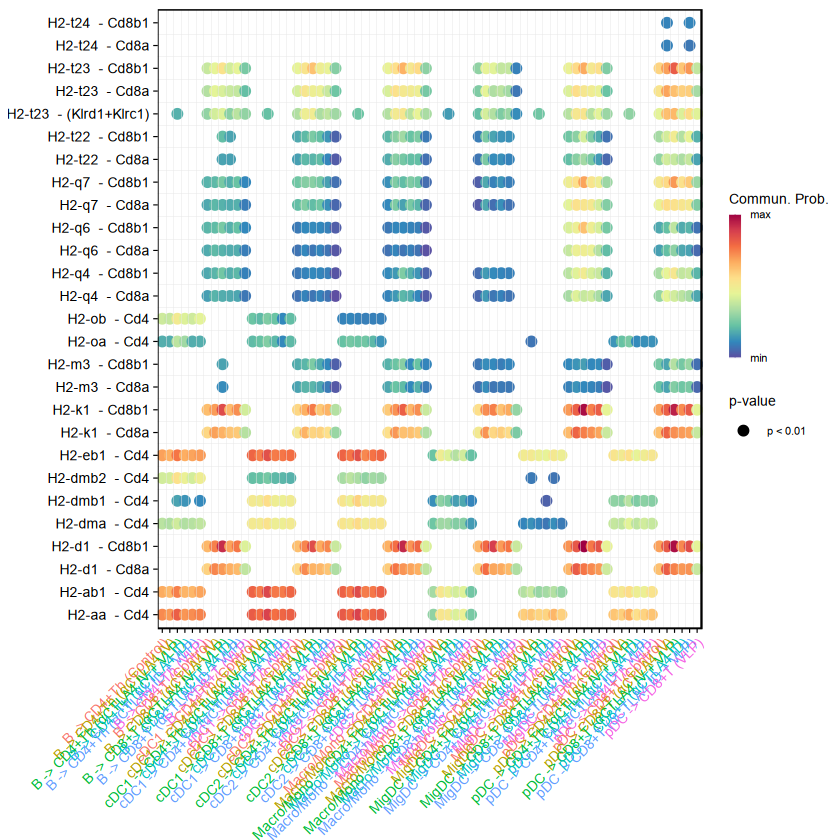

In [15]:
netall <- netVisual_bubble(cellchat, sources.use=c(1,5:9), targets.use=c(2,4), comparison=c(1:6), 
                                 angle.x = 45, signaling = c('MHC-I','MHC-II'),
                                 return.data=F, remove.isolate = T) 
netall
ggsave('plot/bubble_sub_mac_t_all.pdf', netall, width = 12, height =7, device=cairo_pdf)

## Costimulatory and coinhibitory signaling between T cells and APCs

In [16]:
#PMID: 23470321
costim_lr <- c('CD80_CD28','CD86_CD28','ICOSL_CD28','ICOSL_ICOS','CD70_CD27','TNFSF14_TNFRSF14','CD40LG_CD40','TNFSF9_TNFRSF9','TNFSF4_TNFRSF4',
              'TNFSF15_TNFRSF25','TNFSF18_TNFRSF18','TNFSF8_TNFRSF8','NECTIN2_CD226','PVR_CD226')
coinhi_lr <- c('CD80_CTLA4','CD86_CTLA4','ICOSL_CTLA4','CD80_CD274','CD70_CD27','CD274_PDCD1','PDCD1LG2_PDCD1','BTLA_TNFRSF14','CD160_TNFRSF14',
              'LGALS9_HAVCR2','CD48_CD244A','NECTIN3_TIGIT','NECTIN2_TIGIT','PVR_TIGIT')

Comparing communications on a merged object 




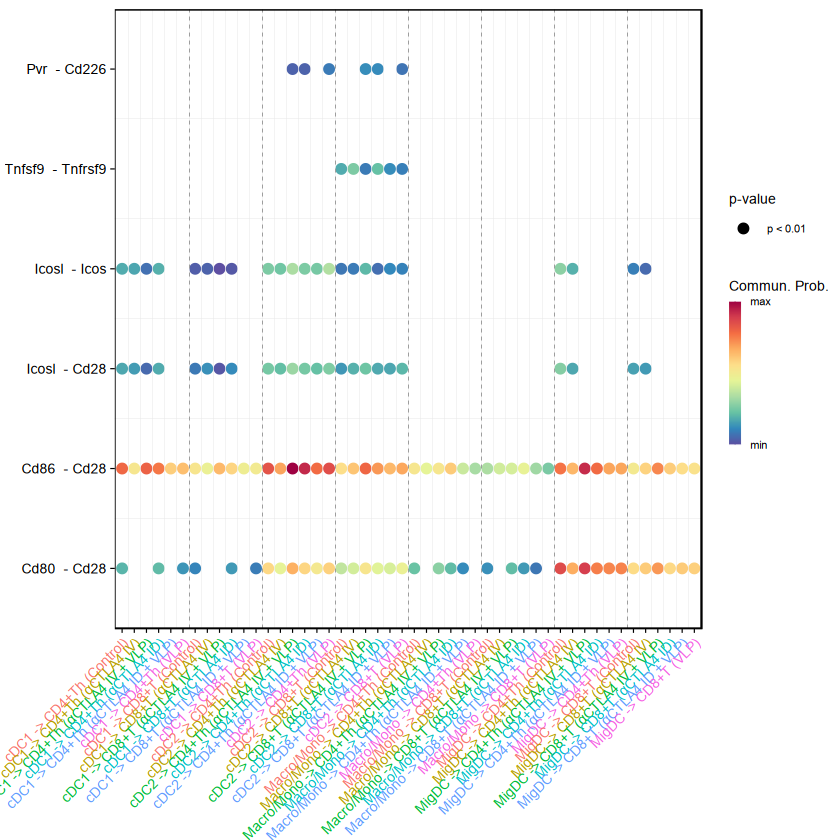

In [17]:
netVisual_bubble(cellchat, sources.use=c(5:8), targets.use=c(2,4), comparison=c(1:6), #
                                 angle.x = 45, pairLR.use =data.frame(interaction_name=costim_lr), 
                                 return.data=F, remove.isolate = F)

In [18]:
df_prob_costim <- netVisual_bubble(cellchat, sources.use=c(1,5:9), targets.use=c(2,4), comparison=c(1:6), 
                                 angle.x = 45, pairLR.use =data.frame(interaction_name=c(costim_lr,coinhi_lr)), 
                                 return.data=T, remove.isolate = F)$communication 

Comparing communications on a merged object 




In [19]:
df_prob_costim <- netVisual_bubble(cellchat, sources.use=c(1,5:9), targets.use=c(2,4), comparison=c(1:6), 
                                 angle.x = 45, pairLR.use =data.frame(interaction_name=c(costim_lr,coinhi_lr)), 
                                 return.data=T, remove.isolate = F)$communication %>% filter(!is.na(prob))
column_names <- c('target', 'source', 'interaction', 'treatment', 'type', 'prob_diff')
lr_diff_prob <- data.frame(matrix(ncol = length(column_names), nrow = 0))
colnames(lr_diff_prob) <- column_names
for(target_i in unique(df_prob_costim$target))
{
    for(source_i in unique(df_prob_costim$source))
    {
        for(lr_i in unique(df_prob_costim$interaction_name))
        {
            lr_ctrl_df <- df_prob_costim[df_prob_costim$source==source_i & df_prob_costim$target==target_i &
                                         df_prob_costim$dataset=='Control' & df_prob_costim$interaction_name==lr_i,]
            if(nrow(lr_ctrl_df) == 0)
                next
            type_lr <- ifelse(lr_ctrl_df$interaction_name[1] %in% costim_lr, 'Costimulatory', 'Coinhibitory')
            for(treat_i in unique(names(object.list)[-1]))
            {
                lr_treat_df <- df_prob_costim[df_prob_costim$source==source_i & df_prob_costim$target==target_i &
                                         df_prob_costim$dataset==treat_i & df_prob_costim$interaction_name==lr_i,]
                if(nrow(lr_treat_df) > 0)
                {
                    lr_diff_prob[nrow(lr_diff_prob)+1,] <- list(target_i, source_i, lr_i, treat_i, type_lr, lr_treat_df[,'prob'] - lr_ctrl_df[,'prob'])
                }
            }
            
        }
    }
}

Comparing communications on a merged object 




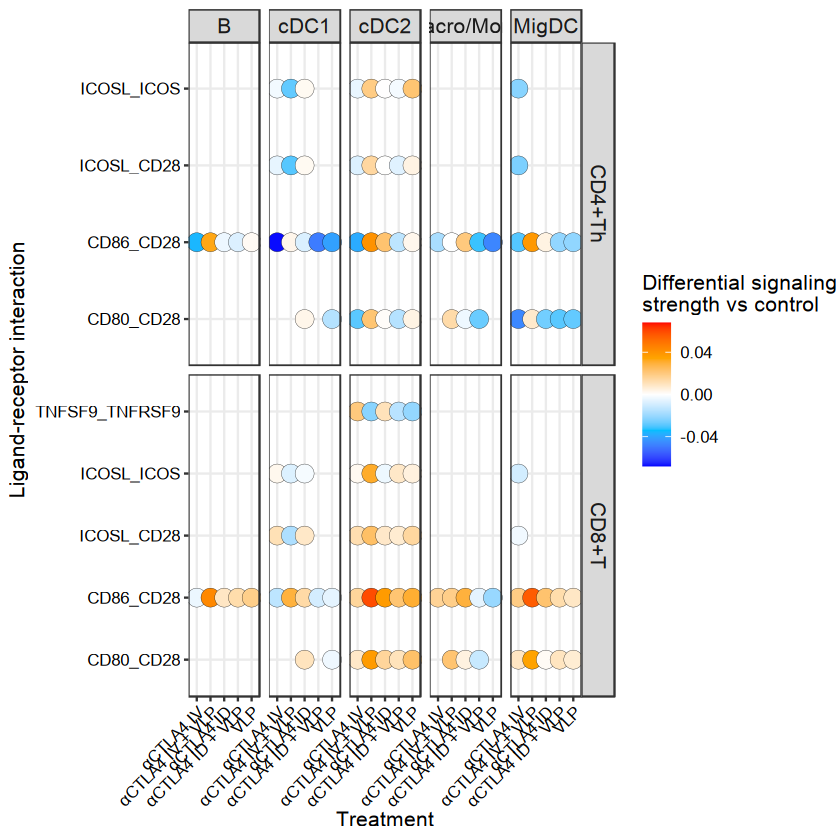

In [20]:
lr_diff_prob$treatment <- factor(lr_diff_prob$treatment, levels=c('αCTLA4 IV','αCTLA4 IV + VLP','αCTLA4 ID','αCTLA4 ID + VLP','VLP'))
ggplot(aes(x=treatment, y=interaction, fill=prob_diff), data=lr_diff_prob %>% filter(type == 'Costimulatory')) + #
    geom_point(size=5, pch=21, color='black') + 
    scale_fill_gradientn(colors=c('blue','deepskyblue','white','orange','red'), limits=c(-0.068,0.068)) + 
    facet_grid(target~source, scale='free_y') + theme_bw() + 
    labs(x='Treatment', y='Ligand-receptor interaction', fill='Differential signaling\nstrength vs control') +
    theme(text=element_text(size=12), axis.text=element_text(color='black'), strip.text=element_text(size=12),
            axis.text.x=element_text(angle=45, hjust=1, vjust=1))
ggsave(paste('plot/b16_bubble_costim.pdf',sep=''), width = 9, height =4, device=cairo_pdf)